##Q1) Build RL solution which has initially a bad policy, so learn the correct policy over time based on the correct/incorrect actions taken by agent

### Solution 1: Play the Pac-Man game using Deep Q-Network(DQN)


### Solution 2: Solve the Cliff Walking problem and and compare the performance  using Q-Learning, SARSA, Expected-SARSA.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CliffWalking-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CliffWalking-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render metho

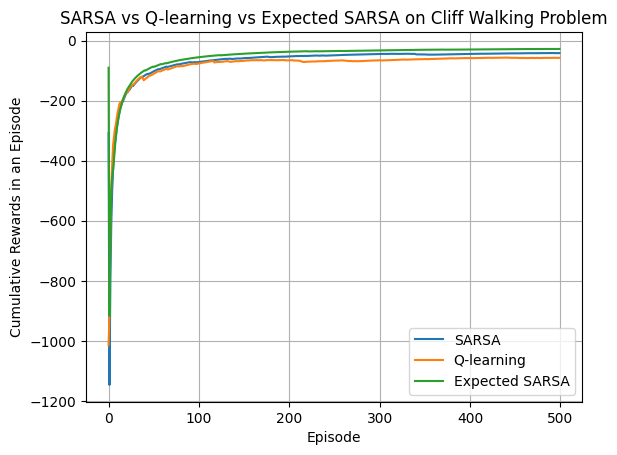

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.wrappers import RecordEpisodeStatistics, RecordVideo


env = gym.make('CliffWalking-v0')
num_eval_episodes = 500
env = RecordVideo(env, video_folder="cartpole-agent", name_prefix="eval",episode_trigger=lambda x: True)
env = RecordEpisodeStatistics(env, num_eval_episodes)

#env = gym.make("CartPole-v1", render_mode="rgb_array")  # replace with your environment
#env = RecordVideo(env, video_folder="cartpole-agent", name_prefix="eval",                  episode_trigger=lambda x: True)
#env = RecordEpisodeStatistics(env, num_eval_episodes)

gama = 1
epsilon = 0.1
alpha = 0.5
actions = [0, 1, 2, 3]  # actions: 0: Left, 1: Down, 2: Right, 3: Up
episodes = 500

# Initialize Q-values for SARSA, Q-learning, and Expected SARSA
sarsa_q_vals = np.zeros((env.observation_space.n, env.action_space.n))
qlearn_q_vals = np.zeros((env.observation_space.n, env.action_space.n))
expected_sarsa_q_vals = np.zeros((env.observation_space.n, env.action_space.n))

# Epsilon-greedy action selection
def select_action(state, q_vals):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return np.argmax(q_vals[state])

# Expected SARSA: Calculate the expected Q-value for a given state based on epsilon-greedy policy
def expected_q_value(state, q_vals):
    best_action = np.argmax(q_vals[state])
    expected_value = 0
    for action in actions:
        prob = epsilon / len(actions)
        if action == best_action:
            prob += (1 - epsilon)
        expected_value += prob * q_vals[state][action]
    return expected_value

# SARSA algorithm
reward_sarsa = []
reward_per_episode = []

for _ in range(episodes):
    state = env.reset()  # Reset the environment, get the initial state
    action = select_action(state, sarsa_q_vals)
    total_reward = 0

    while True:
        state_next, reward, done, _ = env.step(action)  # Include the "info" element as well
        next_action = select_action(state_next, sarsa_q_vals)
        total_reward += reward

        # SARSA update rule
        sarsa_q_vals[state][action] += alpha * (reward + gama * sarsa_q_vals[state_next][next_action] - sarsa_q_vals[state][action])
        state = state_next
        action = next_action
        if done:
            break

    reward_per_episode.append(total_reward)
    reward_sarsa.append(np.mean(reward_per_episode))


# Q-learning algorithm
reward_q_learning = []
reward_per_episode = []

for _ in range(episodes):
    state = env.reset()  # Reset the environment, get the initial state
    total_reward = 0

    while True:
        action = select_action(state, qlearn_q_vals)
        state_next, reward, done, _ = env.step(action)
        total_reward += reward

        # Q-learning update rule
        qlearn_q_vals[state][action] += alpha * (reward + gama * np.max(qlearn_q_vals[state_next]) - qlearn_q_vals[state][action])
        state = state_next
        if done:
            break

    reward_per_episode.append(total_reward)
    reward_q_learning.append(np.mean(reward_per_episode))


# Expected SARSA algorithm
reward_expected_sarsa = []
reward_per_episode = []

for _ in range(episodes):
    state= env.reset()  # Reset the environment, get the initial state
    total_reward = 0

    while True:
        action = select_action(state, expected_sarsa_q_vals)
        state_next, reward, done,_ = env.step(action)
        total_reward += reward

        # Expected SARSA update rule
        expected_sarsa_q_vals[state][action] += alpha * (reward + gama * expected_q_value(state_next, expected_sarsa_q_vals) - expected_sarsa_q_vals[state][action])
        state = state_next
        if done:
            break

    reward_per_episode.append(total_reward)
    reward_expected_sarsa.append(np.mean(reward_per_episode))


# Plot the results
plt.plot(reward_sarsa, label='SARSA')
plt.plot(reward_q_learning, label='Q-learning')
plt.plot(reward_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Cumulative Rewards in an Episode')
plt.title('SARSA vs Q-learning vs Expected SARSA on Cliff Walking Problem')
plt.legend()
plt.grid(True)
plt.show()
